<a href="https://colab.research.google.com/github/miraqulass/MachineLearning/blob/MLPractices/CNN_Assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/MachineLearning-Assgn/Machine Learning/Fashion

/content/drive/MyDrive/MachineLearning-Assgn/Machine Learning/archive (1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)

In [ ]:
test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
938/938 [==============================] - 61s 63ms/step - loss: 0.5408 - accuracy: 0.8028 - val_loss: 0.3856 - val_accuracy: 0.8578
Epoch 2/10
938/938 [==============================] - 55s 59ms/step - loss: 0.3442 - accuracy: 0.8757 - val_loss: 0.3745 - val_accuracy: 0.8624
Epoch 3/10
938/938 [==============================] - 56s 60ms/step - loss: 0.2955 - accuracy: 0.8928 - val_loss: 0.3077 - val_accuracy: 0.8891
Epoch 4/10
938/938 [==============================] - 58s 62ms/step - loss: 0.2666 - accuracy: 0.9022 - val_loss: 0.2998 - val_accuracy: 0.8901
Epoch 5/10
938/938 [==============================] - 55s 59ms/step - loss: 0.2419 - accuracy: 0.9116 - val_loss: 0.2705 - val_accuracy: 0.9030
Epoch 6/10
938/938 [==============================] - 58s 62ms/step - loss: 0.2215 - accuracy: 0.9190 - val_loss: 0.2693 - val_accuracy: 0.9022
Epoch 7/10
938/938 [==============================] - 56s 60ms/step - loss: 0.2014 - accuracy: 0.9254 - val_loss: 0.2614 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 4s 14ms/step - loss: 0.2632 - accuracy: 0.9112
Test accuracy: 91.12%


In [ ]:
y_pred = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [ ]:
y_pred_classes = tf.argmax(y_pred, axis=1)

In [ ]:
true_classes = tf.argmax(test_labels, axis=1)

In [ ]:
classification_rep = classification_report(true_classes, y_pred_classes)

In [ ]:
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.91      0.92      0.91      1000
           4       0.82      0.90      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.69      0.75      1000
           7       0.92      0.99      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



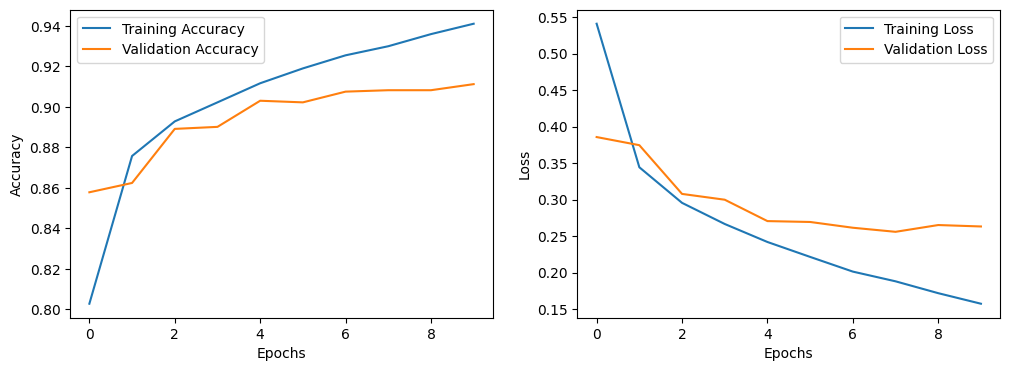

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()